<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN을 이용하여 MNIST dataset 학습하기,
조태호 저, 모두의 딥러닝의 code를 살짝 변형했습니다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(type(X_train))


<class 'numpy.ndarray'>


In [4]:
print(X_train.shape)

(60000, 28, 28)


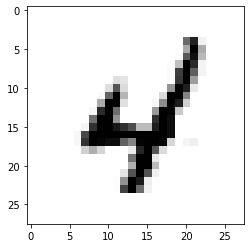

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[257], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.

import sys

for x in X_train[257]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  16722529 0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1122541090  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  18524198 0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  93 25422025 0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  20525417825 0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  53 48 0  0  0  0  0  7  2102541210  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  56 18660 0  0  0  0  3  12825022841 0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  9  1732541020  0  0  0  61 2522541430 

In [ ]:
## 2차원인 Data Frame은 3차원 이상인 numpy.ndarray를 바로는 감당하지 못함.

import pandas as pd

X=pd.DataFrame(X_train)

ValueError: ignored

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[257]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))




Epoch 1: val_loss improved from inf to 0.07375, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07375 to 0.05651, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05651 to 0.04956, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04956 to 0.04574, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04574

Epoch 6: val_loss did not improve from 0.04574

Epoch 7: val_loss improved from 0.04574 to 0.04381, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04381 to 0.04287, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04287

Epoch 10: val_loss did not improve from 0.04287

Epoch 11: val_loss did not improve from 0.04287

Epoch 12: val_loss did not improve from 0.04287

Epoch 13: val_loss did not improve from 0.04287

Epoch 14: val_loss did not improve from 0.04287

Epoch 15: val_loss did not impro

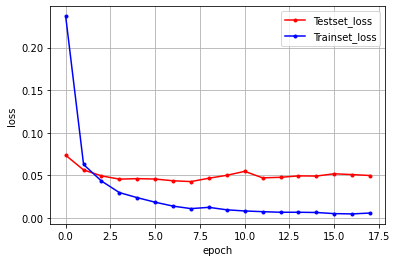

In [ ]:
# 검증셋과 학습셋의 오차를 그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()